<a href="https://colab.research.google.com/github/akriti0998/Global-Terrorism-Analysis-/blob/main/EDA_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
     


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
global_terror = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
global_terror.shape

(181691, 135)

In [5]:
global_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
global_terror=global_terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
global_terror.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
global_terror.isna().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
global_terror.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
global_terror.nunique()  

eventid       181691
Year              47
Month             13
Day               32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [19]:
print("Country with the most attacks :",global_terror['Country'].value_counts().idxmax())
print("City with the most attacks    :",global_terror['city'].value_counts().index[1])
print("Region with the most attacks  :",global_terror['Region'].value_counts().idxmax())
print("Year with the most attacks    :",global_terror['Year'].value_counts().idxmax())
print("Month with the most attacks   :",global_terror['Month'].value_counts().idxmax())
print("Group with the most attacks   :",global_terror['Group'].value_counts().index[1])
print("Most Attack Types             :",global_terror['AttackType'].value_counts().idxmax())

Country with the most attacks : Iraq
City with the most attacks    : Baghdad
Region with the most attacks  : Middle East & North Africa
Year with the most attacks    : 2014
Month with the most attacks   : 5
Group with the most attacks   : Taliban
Most Attack Types             : Bombing/Explosion


In [20]:
global_terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

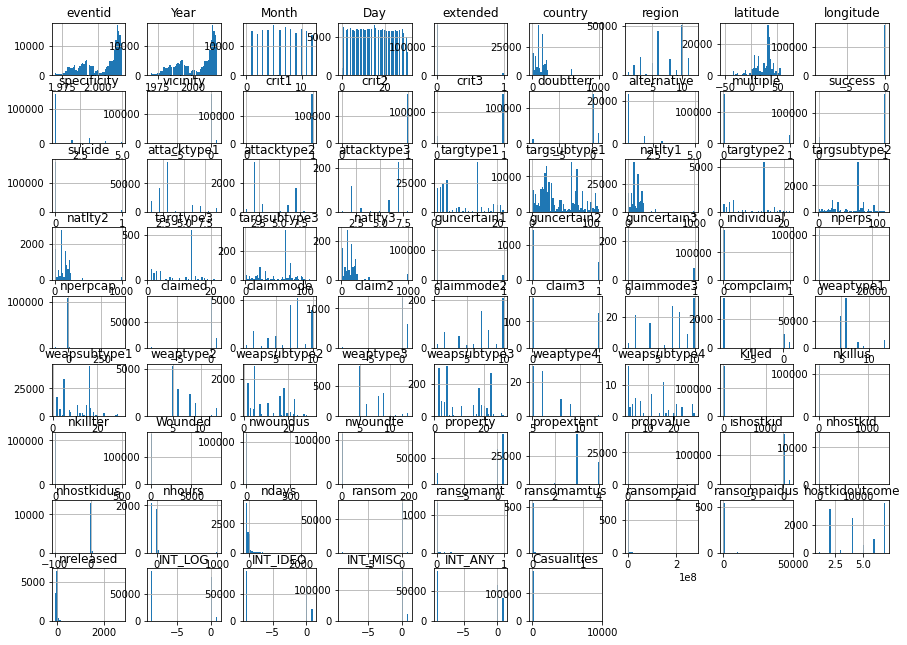

In [23]:
global_terror.hist(bins = 50,figsize = (15,11));

In [22]:
global_terror.corr().abs()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,0.135039,0.401371,0.166886,0.003907,0.030641,...,0.018001,0.014094,0.165422,0.256113,0.181612,0.143600,0.133252,0.077852,0.175605,0.020684
Year,0.999996,1.000000,0.000139,0.018254,0.091754,0.135023,0.401384,0.166933,0.003917,0.030626,...,0.018216,0.014238,0.165375,0.256092,0.181556,0.143601,0.133253,0.077847,0.175596,0.020675
Month,0.002706,0.000139,1.000000,0.005497,0.000468,0.006305,0.002999,0.015978,0.003880,0.003621,...,0.046989,0.058878,0.016597,0.011295,0.011535,0.002302,0.002034,0.002554,0.006336,0.003805
Day,0.018336,0.018254,0.005497,1.000000,0.004700,0.003468,0.009710,0.003423,0.002285,0.006991,...,0.010502,0.003148,0.006581,0.006706,0.001765,0.001540,0.001621,0.002027,0.001199,0.001808
extended,0.091761,0.091754,0.000468,0.004700,1.000000,0.020466,0.038389,0.024749,0.000523,0.057897,...,0.028177,0.001966,0.009367,0.233293,0.192155,0.071768,0.075147,0.027335,0.080767,0.004570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INT_LOG,0.143600,0.143601,0.002302,0.001540,0.071768,0.069904,0.082584,0.099827,0.002272,0.073022,...,0.031079,0.007029,0.045504,0.015442,0.039388,1.000000,0.996211,0.052537,0.891051,0.030027
INT_IDEO,0.133252,0.133253,0.002034,0.001621,0.075147,0.067564,0.071917,0.094470,0.002268,0.071333,...,0.041983,0.013162,0.039844,0.016234,0.040947,0.996211,1.000000,0.082014,0.893811,0.031764
INT_MISC,0.077852,0.077847,0.002554,0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,0.019197,...,0.125162,0.037227,0.129274,0.119776,0.085055,0.052537,0.082014,1.000000,0.252193,0.007716
INT_ANY,0.175605,0.175596,0.006336,0.001199,0.080767,0.153118,0.047900,0.041530,0.002497,0.061389,...,0.053484,0.007275,0.056438,0.061946,0.064759,0.891051,0.893811,0.252193,1.000000,0.023423


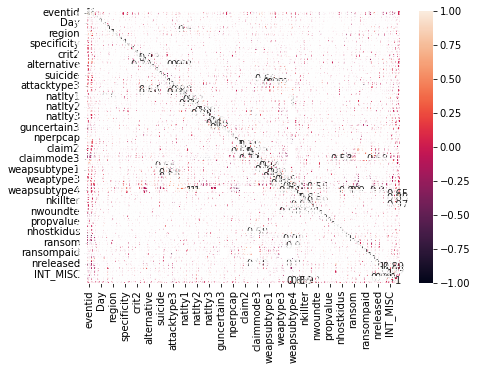

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(global_terror.corr(), annot=True)
plt.show()
     

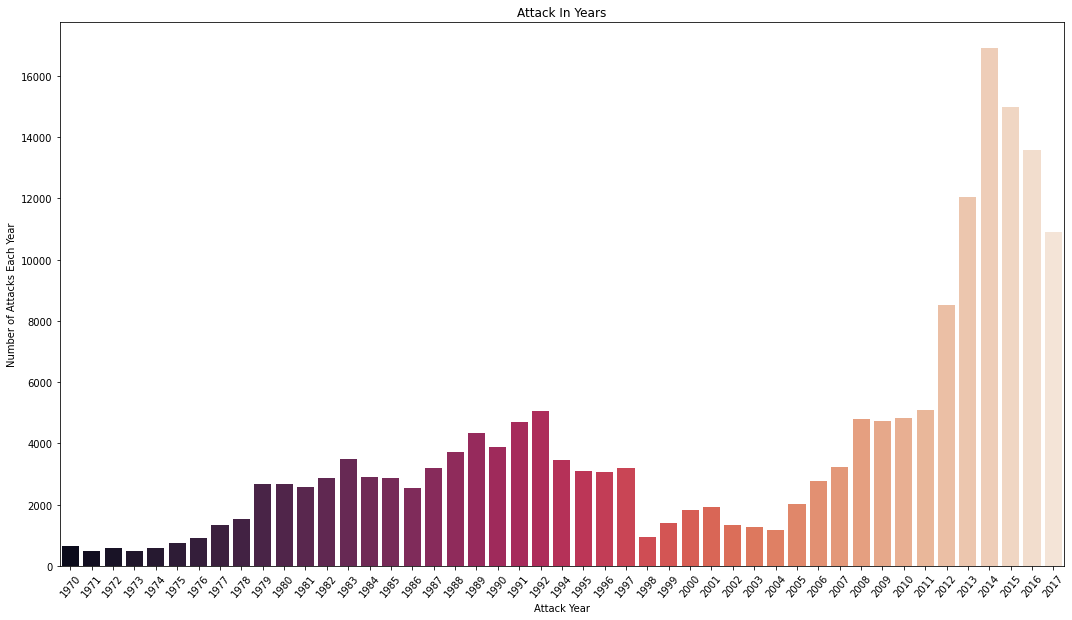

In [18]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year, y = y_count_years, palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

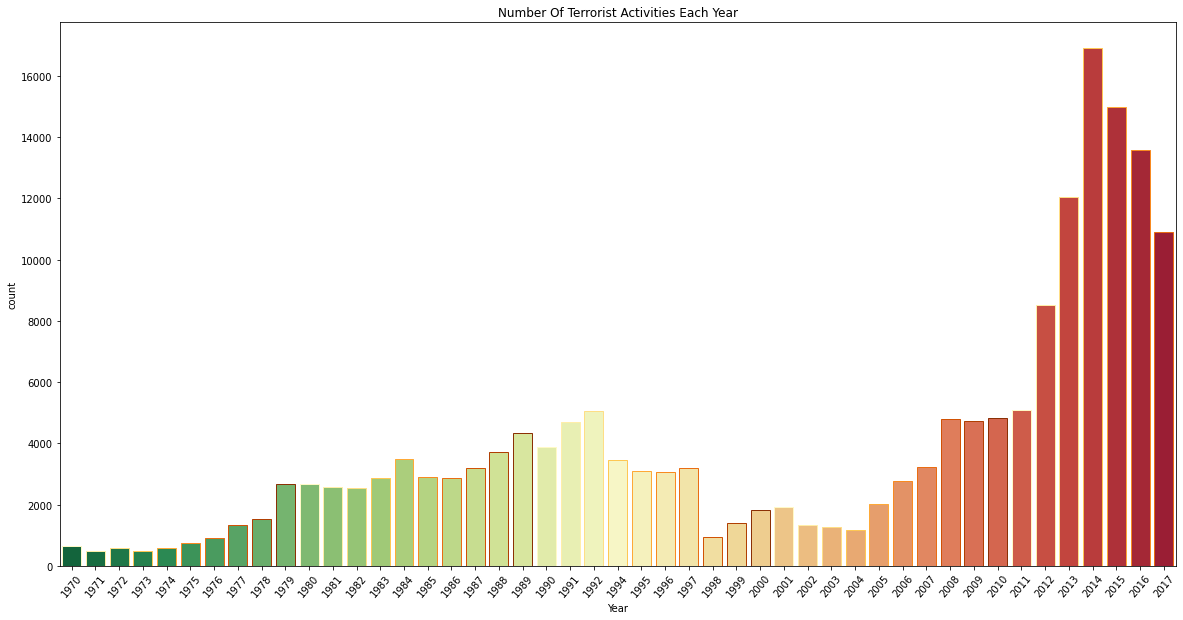

In [17]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=global_terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=50)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

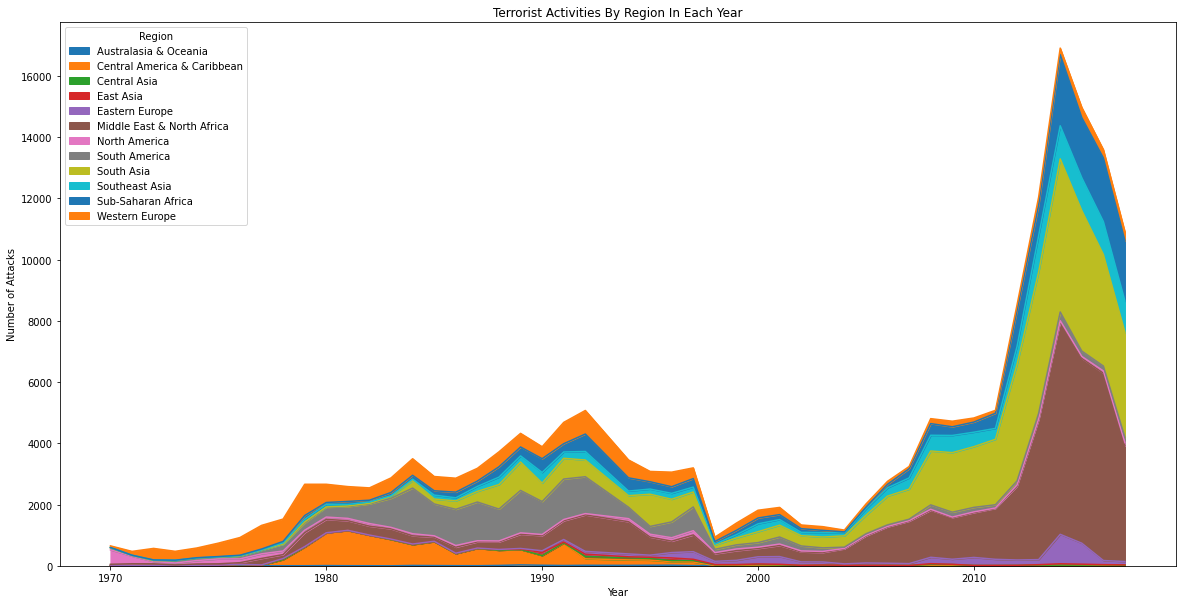

In [16]:
pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [15]:
global_terror['Wounded'] = global_terror['Wounded'].fillna(0).astype(int)
global_terror['Killed'] = global_terror['Killed'].fillna(0).astype(int)
global_terror['Casualities'] = global_terror['Killed'] + global_terror['Wounded']

In [25]:
global_terror1 = global_terror.sort_values(by='Casualities',ascending=False).reset_index()
global_terror1.head()

,index,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
0,73126,200109110004,2001,9,11,NaN,0,NaN,217,United States,...,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110004, 200109110005, 200109110006, 2001...",9574
1,73127,200109110005,2001,9,11,NaN,0,NaN,217,United States,...,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110005, 200109110004, 200109110006, 2001...",9574
2,58841,199503200014,1995,3,20,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,5513
3,68071,199808070002,1998,8,7,NaN,0,NaN,104,Kenya,...,"Laura Myers, U.S. promises to hit back if any...","Kenya; New Twist in bomb Tragedy, Africa New...","Blast toll tops 200, Evening Herald (Plymout...",CETIS,0,1,1,1,"199808070002, 199808070003",4224
4,133518,201406150063,2014,6,12,NaN,1,NaN,95,Iraq,...,"""Iraq exhumes 470 bodies of 'ISIL massacre vic...","""Scene of Iraqi Massacre Becomes Shiite Pilgri...","""Iraq Empties Mass Graves in Search for Cadets...",START Primary Collection,0,1,0,1,NaN,1570


In [26]:
global_terror1.shape

(181691, 137)

In [27]:
heat=global_terror1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


In [28]:
heat.shape

(205, 47)

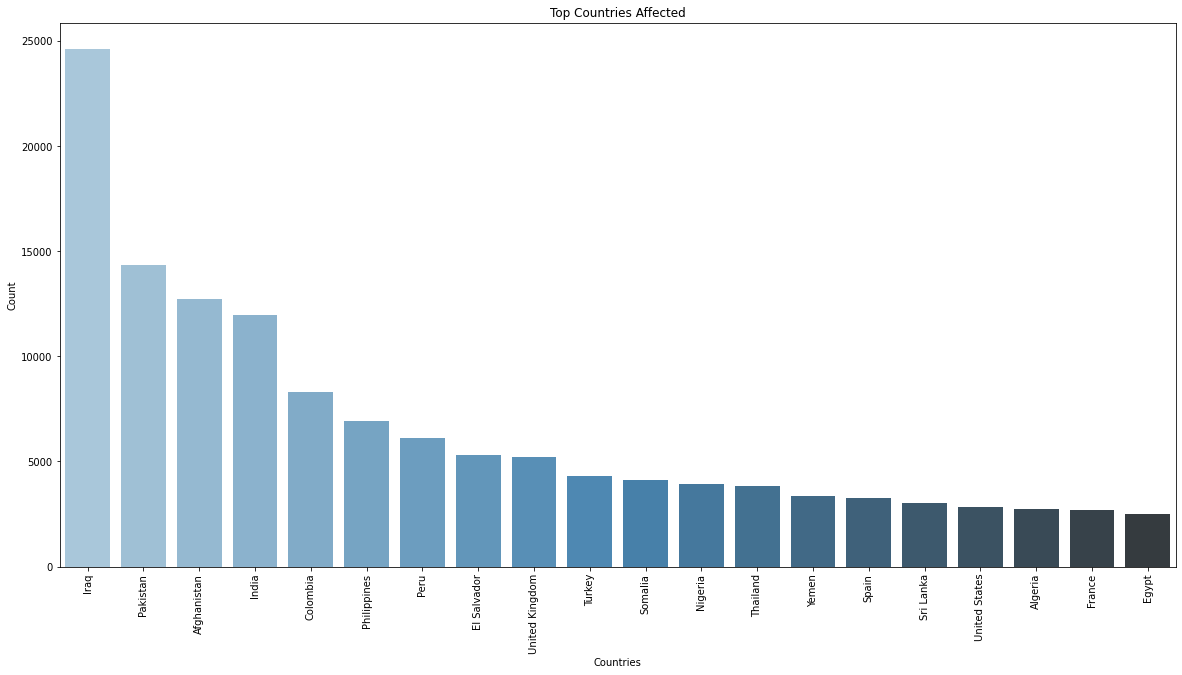

In [29]:
plt.subplots(figsize=(20,10))
sns.barplot(global_terror['Country'].value_counts()[:20].index,global_terror['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [30]:
filterYear = global_terror[global_terror['Year'] == 2001].reset_index(drop=True)
filterYear

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
0,200101000001,2001,1,0,"January 8-9, 2001",0,NaN,45,Colombia,3,...,"""Twenty murdered in attacks across Colombia at...","""Colombia violence leaves 35 dead,"" Agence Fra...",NaN,UMD Schmid 2012,-9,-9,0,-9,NaN,3
1,200101010001,2001,1,1,NaN,0,NaN,228,Yemen,10,...,Bomb Blast Outside Yemeni News Agency Office ...,"Authorities Arrest Suspects in Aden Bombings,...",NaN,CETIS,-9,-9,0,-9,NaN,0
2,200101010002,2001,1,1,NaN,1,1/7/2001,45,Colombia,3,...,Colombia  Kidnapping 17 Kidnap Victims Freed...,Paramilitary Group Releases 17 Peasants it Ca...,NaN,CETIS,0,0,0,0,NaN,0
3,200101010004,2001,1,1,NaN,0,NaN,209,Turkey,10,...,"""Bomb explosion injures 10 Turks, mars new yea...","""10 injuries in bomb explosion in Istanbul,"" A...","""Update 1 - Ten wounded in Istanbul bomb blast...",UMD Schmid 2012,-9,-9,0,-9,NaN,10
4,200101010005,2001,1,1,NaN,0,NaN,6,Algeria,10,...,"""Algeria: Five people reportedly killed by 'te...","""URGENT--- Five people killed in Algeria: offi...","""Latest attacks claim nine lives in violence-t...",UMD Algeria 2010-2012,0,0,0,0,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,200112280002,2001,12,28,NaN,0,NaN,8,Angola,11,...,Portuguese man killed in alleged UNITA attack...,"Unita kills Portuguese citizen in Angola,"" Di...",NaN,CETIS,0,1,1,1,NaN,4
1902,200112280003,2001,12,28,NaN,0,NaN,213,Uganda,11,...,"US missionary killed in east,"" The Monitor, D...",NaN,NaN,CETIS,-9,-9,1,1,NaN,1
1903,200112300001,2001,12,30,NaN,0,NaN,92,India,6,...,Suspected Rebels Kill 4 in Indian-Controlled ...,NaN,NaN,CETIS,-9,-9,0,-9,NaN,4
1904,200112300002,2001,12,30,NaN,0,NaN,167,Russia,9,...,Chechens reportedly kill seven Russian soldie...,Chechen rebels reportedly attack Russian mili...,NaN,CETIS,0,0,0,0,NaN,4


In [31]:
filterYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Columns: 136 entries, eventid to Casualities
dtypes: float64(53), int64(25), object(58)
memory usage: 2.0+ MB
